<a href="https://colab.research.google.com/github/rukka0808/Deep-Learning-Study/blob/main/MNIST_Early_stop_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math

print(tf.__version__)

2.5.0


In [2]:
# Define Constants
batch_size = 128
epochs = 10000
num_classes = 10

In [3]:
# Download MNIST dataset.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
#Normalize data between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Reshape(target_shape=(28, 28, 1)),
                          keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
                          keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Dropout(0.25),
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
filepath = 'drive/MyDrive/data/digits_model.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True)

In [7]:
monitorEarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [8]:
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[modelCheckpoint, monitorEarlyStop])

Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


469/469 [==============================] - 36s 15ms/step - loss: 0.2316 - accuracy: 0.9293 - val_loss: 0.0537 - val_accuracy: 0.9828
Epoch 2/10000
469/469 [==============================] - 7s 14ms/step - loss: 0.0809 - accuracy: 0.9763 - val_loss: 0.0379 - val_accuracy: 0.9871
Epoch 3/10000
469/469 [==============================] - 7s 14ms/step - loss: 0.0605 - accuracy: 0.9814 - val_loss: 0.0363 - val_accuracy: 0.9871
Epoch 4/10000
469/469 [==============================] - 7s 14ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0321 - val_accuracy: 0.9890
Epoch 5/10000
469/469 [==============================] - 7s 15ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0299 - val_accuracy: 0.9893
Epoch 6/10000
469/469 [==============================] - 7s 14ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.0278 - val_accuracy: 0.9909
Epoch 7/10000
469/469 [==============================] - 7s 14ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0284 - val_accuracy

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0

In [11]:
# Save Model
savefile = 'drive/MyDrive/data/saved_digits.h5'
model.save(savefile)

In [12]:
load_model = tf.keras.models.load_model(savefile)

In [13]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0

In [14]:
test_loss, test_acc = load_model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

 15/313 [>.............................] - ETA: 1s - loss: 0.0151 - accuracy: 0.9917      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 1s 4ms/step - loss: 0.0284 - accuracy: 0.9930
Test Accuracy:  0.9929999709129333


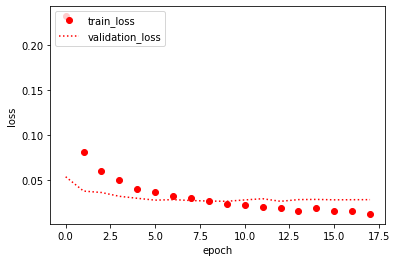

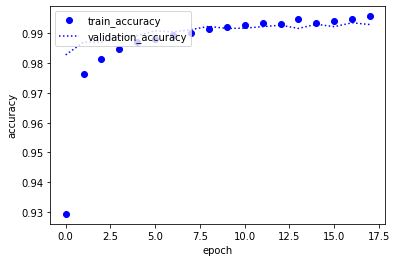

In [15]:
fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train_loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='validation_loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train_accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='validation_accuracy')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')

acc_ax.legend(loc='upper left')

plt.show()